In [1]:
# project: final
# submitter: bli379
# partner: none
# hours: 10

In [61]:
import pandas as pd
import requests
import os
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer,PolynomialFeatures
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xlrd
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
import numpy as np

In [3]:
plt.rcParams["font.size"] = 16

In [4]:
#unit Billions of Dollars
population_url = 'https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=B230RC0A052NBEA&scale=left&cosd=1929-01-01&coed=2020-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-01-01&line_index=1&transformation=lin&vintage_date=2021-04-25&revision_date=2021-04-25&nd=1929-01-01'
population_df = pd.read_excel(population_url)
population_df = population_df[51:100]
population_df.columns = ['year','population in thouthands']

year = []
for i in range(1970,2019):
    year.append(i)

population_df = pd.DataFrame({'year': year,'population in thouthand':population_df['population in thouthands']})
population_df['population in thouthand'] = population_df['population in thouthand']

population_df.set_index('year', inplace=True)
population_df.head()

,population in thouthand
year,
1970,205089
1971,207692
1972,209924
1973,211939
1974,213898


In [5]:
#unit Billions of Dollars
gdp_url = 'https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDPA&scale=left&cosd=1929-01-01&coed=2020-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-01-01&line_index=1&transformation=lin&vintage_date=2021-04-25&revision_date=2021-04-25&nd=1929-01-01'
gdp_df = pd.read_excel(gdp_url)
gdp_df = gdp_df[51:100]
gdp_df.columns = ['year','dollar in billions']

year = []
for i in range(1970,2019):
    year.append(i)

gdp_df = pd.DataFrame({'year': year,'gdp in billions':gdp_df['dollar in billions']})
gdp_df['gdp in billions'] = gdp_df['gdp in billions']
gdp_df.set_index('year', inplace=True)
gdp_df.head()

,gdp in billions
year,
1970,1073.3
1971,1164.85
1972,1279.11
1973,1425.38
1974,1545.24


In [84]:
sex_url = 'https://nces.ed.gov/programs/digest/d19/tables/xls/tabn303.70.xls'
sex_df = pd.read_excel(sex_url)
#set index
sex_df.columns = ['year','total','full-time','part-time','male','female','male-full-time','male-part-time','female-full-time','female-part-time','public','private','nonprofit','profit']

#slice valueble data and delete misplaced title
sex_df = sex_df[4:41]

#replace --- with 0
sex_df=sex_df.mask(sex_df=='---').fillna(0)

#set year as index
sex_df.set_index('year', inplace=True)
sex_df = sex_df/1000000
sex_df.head()

,total,full-time,part-time,male,female,male-full-time,male-part-time,female-full-time,female-part-time,public,private,nonprofit,profit
year,,,,,,,,,,,,,
1970,7.368644,5.280064,2.088580,4.249702,3.118942,3.096371,1.153331,2.183693,0.935249,5.620255,1.748389,1.730133,0.018256
1975,9.679455,6.168396,3.511059,5.257005,4.422450,3.459328,1.797677,2.709068,1.713382,7.826032,1.853423,1.814844,0.038579
1980,10.475055,6.361744,4.113311,5.000177,5.474878,3.226857,1.773320,3.134887,2.339991,8.441955,2.033100,1.926703,0.106397
1985,10.596674,6.319592,4.277082,4.962080,5.634594,3.156446,1.805634,3.163146,2.471448,8.477125,2.119549,1.928996,0.190553
1986,10.797975,6.352073,4.445902,5.017505,5.780470,3.146330,1.871175,3.205743,2.574727,8.660716,2.137259,1.928294,0.208965


In [85]:
age_url = 'https://nces.ed.gov/programs/digest/d19/tables/xls/tabn101.10.xls'
age_df = pd.read_excel(age_url)
#set index
age_df.columns = ['year',1,2,3,4,5,6,7,8,9,10,11]

#drop unrelated col
age_df.drop(columns=[2,3,4,5,6,8,9,10,11], inplace=True)
age_df.columns = ['year','resident population','18-19']

age_df= age_df[3:52]
#find percentage of undegrate enroll year / total
age_df['school age percentage of resident population'] = (age_df['18-19'] / age_df['resident population'])*100

#set year as index
age_df.set_index('year', inplace=True)
age_df.head()

,resident population,18-19,school age percentage of resident population
year,,,
1970,205052,7509.68,3.66233
1971,207661,7714.53,3.71497
1972,209896,7923.25,3.77484
1973,211909,8113.94,3.82898
1974,213854,8257.47,3.86127


In [96]:
#merge two together
result_df = pd.concat([sex_df['total'], age_df['school age percentage of resident population'],gdp_df,population_df], axis=1, join="inner")
result_df.columns = ['total in millions','school age/resident population %','gdp in billions','population in thouthand']
result_df.head()

,total in millions,school age/resident population %,gdp in billions,population in thouthand
year,,,,
1970,7.368644,3.66233,1073.3,205089
1975,9.679455,3.92571,1684.9,215981
1980,10.475055,3.83673,2857.31,227726
1985,10.596674,3.20985,4338.98,238506
1986,10.797975,3.11619,4579.63,240683


Text(0.5, 1.0, 'Figure 1: Undergraduate enrollment, by sex')

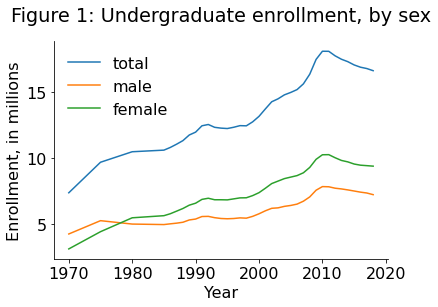

In [99]:
#figure one: male, female
male = sex_df['male']
female = sex_df['female'] 
total = sex_df['total']

ax = total.plot.line(label="total")
ax = male.plot.line(label="male")
ax = female.plot.line(label="female")


ax.legend(frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Enrollment, in millions")
ax.set_xlabel("Year")
ax.set_title("Figure 1: Undergraduate enrollment, by sex", pad=20)

In [102]:
xcols = ['school age/resident population %','gdp in billions','population in thouthand']
ycol = "total in millions"

1    0.999281
2    1.000000
3    1.000000
dtype: float64
1    0.868062
2    0.996404
3    1.000000
dtype: float64


Text(0.5, 1.0, 'Figure 2: Principal Components Analysis')

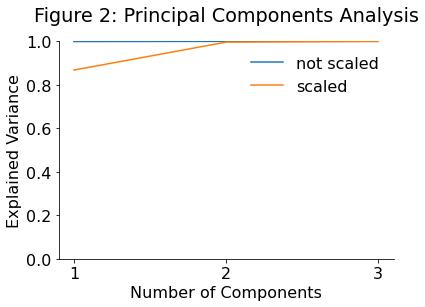

In [107]:
def explained(scale):
    stages = []
    if scale:
        stages.append(("std", StandardScaler()))
    stages.append(("pca", PCA()))
    p = Pipeline(stages)
    p.fit(result_df[xcols])
    #print(p["pca"].components_.round(2))
    explained = p["pca"].explained_variance_
    s = pd.Series(explained.cumsum() / explained.sum(),
                  index=range(1, len(xcols)+1))
    
    print(s)
    return s

ax = explained(False).plot.line(label="not scaled", ylim=0)
explained(True).plot.line(label="scaled", ax=ax)
ax.set_xlabel("Number of Components")
ax.set_ylabel("Explained Variance")
ax.set_xticks([1,2,3])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(frameon=False)
ax.set_title("Figure 2: Principal Components Analysis", pad=20)

In [120]:
train, test = train_test_split(result_df, random_state=0)
p = Pipeline([
    ("both", make_column_transformer(
                                     (StandardScaler(), xcols),
 
                                     remainder = 'passthrough')),
    ("lr", LinearRegression())
])

In [123]:
p.fit(train[xcols],train[ycol])
p.score(test[xcols],test[ycol])

0.8847727350662244

In [124]:
coef = p['lr'].coef_
coef

array([ 0.6581983 , -1.30471385,  4.5472452 ])

Text(0.5, 1.0, 'Figure 3: Linear Regression Coefficients')

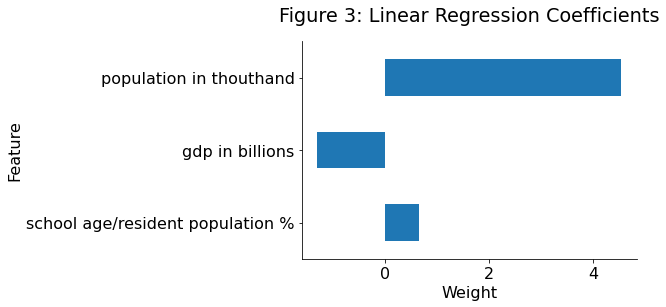

In [125]:
ax = pd.Series(p["lr"].coef_, index=xcols).plot.barh()

ax.set_xlabel("Weight")
ax.set_ylabel("Feature")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Figure 3: Linear Regression Coefficients", pad=20)